# Analyse en Composantes Principales (ACP)
## Comparaison du Niveau de Développement Économique des Pays

### Objectif
Ce notebook réalise une analyse complète en composantes principales (ACP) pour comparer le niveau de développement économique de 20 pays à travers 18 indicateurs.

### Structure du Notebook (5 Phases)
1. **Phase 1**: Préparation des données & Statistiques
2. **Phase 2**: Choix des dimensions (Valeurs propres)
3. **Phase 3**: Analyse des variables (Colonnes)


---
# SETUP - Import Libraries

In [81]:
# Standard libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
np.set_printoptions(precision=4, suppress=True)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


---
# LOAD DATA

In [82]:
# Load the economic development dataset
csv_path = 'Comparaison du niveau de développement économique des pays.csv'
df = pd.read_csv(csv_path)

# Set country name as index
df = df.set_index('Country Name')

# Remove empty rows if any
df = df.dropna(how='all')

# Define the mapping from English to French names for indicators
column_rename_map = {
    'GDP per capita': 'PIB par habitant',
    'GDP growth (annual %)': 'Croissance PIB (annuel %)',
    'GDP per person employed': 'PIB par personne employée',
    'Life expectancy at birth, total (years)': 'Espérance de vie à la naissance',
    'Mortality rate, infant (per 1,000 live births)': 'Taux mortalité infantile (‰)',
    'Access to electricity (% of population)': 'Accès électricité (% pop.)',
    'People using at least basic drinking water services (% of population)': 'Accès eau potable (% pop.)',
    'School enrollment, secondary (% gross)': 'Taux scolarisation secondaire',
    'Literacy rate (% people 15 and above)': 'Taux alphabétisation (15+ ans)',
    'Unemployment (% of total labor force)': 'Chômage (% pop. active)',
    'Employment to population, total (%)': 'Emploi/Pop. totale (%)',
    'Gini index': 'Indice de Gini',
    'Poverty headcount ratio (% of population)': 'Taux pauvreté (% pop.)',
    'Inflation, GDP deflator (annual %)': 'Inflation, déflateur PIB (annuel %)',
    'Inflation, consumer prices (annual %)': 'Inflation, prix conso (annuel %)',
    'Central government debt (% of GDP)': 'Dette gouv. centrale (% PIB)',
    'Government expenditure on health (% of GDP)': 'Dépenses gouv. santé (% PIB)',
    'Government expenditure on education (% of GDP)': 'Dépenses gouv. éducation (% PIB)',
    'Industry value added (% of GDP)': 'Valeur ajoutée industrie (% PIB)'
}

# Rename the columns
df = df.rename(columns=column_rename_map)

print(f"Dataset: {df.shape[0]} pays × {df.shape[1]} indicateurs")
print("\nListe des pays:")
print(df.index.tolist())

Dataset: 19 pays × 19 indicateurs

Liste des pays:
['Algeria', 'Brazil', 'Burkina Faso', 'Canada', 'China', 'Congo, Rep.', 'Ethiopia', 'Germany', 'Japan', 'Mexico', 'Niger', 'Norway', 'Russian Federation', 'South Africa', 'Spain', 'Switzerland', 'Turkiye', 'United Kingdom', 'United States']


In [83]:
# Display all variables (indicators)
print("Indicateurs économiques disponibles:")
print("="*50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

Indicateurs économiques disponibles:
 1. PIB par habitant
 2. Croissance PIB (annuel %)
 3. PIB par personne employée
 4. Espérance de vie à la naissance
 5. Taux mortalité infantile (‰)
 6. Accès électricité (% pop.)
 7. Accès eau potable (% pop.)
 8. Taux scolarisation secondaire
 9. Taux alphabétisation (15+ ans)
10. Chômage (% pop. active)
11. Emploi/Pop. totale (%)
12. Indice de Gini
13. Taux pauvreté (% pop.)
14. Inflation, déflateur PIB (annuel %)
15. Inflation, prix conso (annuel %)
16. Dette gouv. centrale (% PIB)
17. Dépenses gouv. santé (% PIB)
18. Dépenses gouv. éducation (% PIB)
19. Valeur ajoutée industrie (% PIB)





### 1️⃣ **PIB par habitant**

→ Richesse moyenne produite par personne
📌 Indicateur du **niveau de vie moyen**

---

### 2️⃣ **Croissance du PIB (annuel %)**

→ Vitesse à laquelle l’économie grandit chaque année
📌 Économie en expansion ou en récession

---

### 3️⃣ **PIB par personne employée**

→ Productivité moyenne d’un travailleur
📌 Plus c’est élevé → travailleurs plus productifs

---

### 4️⃣ **Espérance de vie à la naissance**

→ Nombre moyen d’années qu’un nouveau-né peut espérer vivre
📌 Résume la **qualité du système de santé et de vie**

---

### 5️⃣ **Taux de mortalité infantile (‰)**

→ Décès d’enfants avant 1 an pour 1000 naissances
📌 Plus élevé = conditions sanitaires difficiles

---

### 6️⃣ **Accès à l’électricité (% pop.)**

→ Pourcentage de la population ayant l’électricité
📌 Indicateur d’infrastructure de base

---

### 7️⃣ **Accès à l’eau potable (% pop.)**

→ Population ayant accès à une eau sûre
📌 Lié à la santé publique

---

### 8️⃣ **Taux de scolarisation secondaire**

→ Proportion des jeunes inscrits dans le secondaire
📌 Mesure l’accès à l’éducation

---

### 9️⃣ **Taux d’alphabétisation (15+ ans)**

→ Pourcentage d’adultes sachant lire et écrire
📌 Capital humain de base

---

### 🔟 **Chômage (% population active)**

→ Part des personnes sans emploi mais cherchant du travail
📌 Indicateur du marché du travail

---

### 1️⃣1️⃣ **Emploi / Population totale (%)**

→ Proportion de personnes réellement employées
📌 Différent du chômage (plus global)

---

### 1️⃣2️⃣ **Indice de Gini**

→ Mesure des **inégalités de revenu**

* 0 = égalité parfaite
* 1 = inégalité totale

📌 Plus élevé = plus d’inégalités

---

### 1️⃣3️⃣ **Taux de pauvreté (% pop.)**

→ Part de la population vivant sous le seuil de pauvreté
📌 Exclusion économique

---

### 1️⃣4️⃣ **Inflation, déflateur du PIB (%)**

→ Inflation globale de l’économie
📌 Inclut tous les biens produits

---

### 1️⃣5️⃣ **Inflation, prix à la consommation (%)**

→ Inflation ressentie par les ménages
📌 Hausse du coût de la vie

---

### 1️⃣6️⃣ **Dette gouvernement centrale (% PIB)**

→ Niveau d’endettement de l’État
📌 Soutenabilité des finances publiques

---

### 1️⃣7️⃣ **Dépenses publiques de santé (% PIB)**

→ Part de la richesse nationale investie dans la santé
📌 Priorité donnée à la santé

---

### 1️⃣8️⃣ **Dépenses publiques d’éducation (% PIB)**

→ Investissement de l’État dans l’éducation
📌 Préparation du capital humain futur

---

### 1️⃣9️⃣ **Valeur ajoutée industrielle (% PIB)**

→ Poids de l’industrie dans l’économie
📌 Niveau d’industrialisation






In [84]:
# Preview the data
df.head(10)

,PIB par habitant,Croissance PIB (annuel %),PIB par personne employée,Espérance de vie à la naissance,Taux mortalité infantile (‰),Accès électricité (% pop.),Accès eau potable (% pop.),Taux scolarisation secondaire,Taux alphabétisation (15+ ans),Chômage (% pop. active),Emploi/Pop. totale (%),Indice de Gini,Taux pauvreté (% pop.),"Inflation, déflateur PIB (annuel %)","Inflation, prix conso (annuel %)",Dette gouv. centrale (% PIB),Dépenses gouv. santé (% PIB),Dépenses gouv. éducation (% PIB),Valeur ajoutée industrie (% PIB)
Country Name,,,,,,,,,,,,,,,,,,,
Algeria,4468.453419,0.900000,59207.384801,75.682000,20.7,99.5,94.239140,72.456326,81.456325,11.478,36.245,27.6,17.4,0.882993,1.951768,50.823156,3.275980,5.575366,33.574321
Brazil,9029.833267,1.220778,39945.508642,75.809000,13.0,99.8,98.935544,103.953278,93.901925,11.936,56.953,53.5,19.7,4.224259,3.732976,92.565253,3.917019,5.963470,18.754628
Burkina Faso,764.853078,5.889205,8336.473797,60.184000,50.2,17.6,49.002853,40.077046,29.660000,1.560,76.407,37.4,41.4,0.512901,-3.233389,47.062363,2.244565,5.456156,27.425913
Canada,46352.869345,1.908432,110430.505980,82.163659,4.5,100.0,99.221655,110.980072,99.015477,5.690,62.294,31.7,11.0,1.546071,1.949269,53.362325,7.686245,4.772930,24.077408
China,10342.900952,6.068502,35777.215320,77.940000,6.0,100.0,95.317372,108.948965,97.585210,5.150,67.350,38.2,0.6,1.315507,2.899234,40.732650,2.995034,4.067965,37.764233
"Congo, Rep.",2488.424667,1.124474,22023.733539,63.152000,33.0,47.7,73.595870,50.654865,75.123156,20.139,62.812,48.9,40.9,-1.317367,2.206073,90.024130,1.029252,3.247164,50.128672
Ethiopia,828.709081,8.364086,5937.354566,65.741000,41.0,48.0,47.253979,33.484520,55.049999,7.450,65.213,37.6,23.5,12.860433,15.809632,31.448845,0.730885,4.480869,24.822364
Germany,47623.865607,0.987893,122853.413462,81.292683,3.1,100.0,100.000000,101.152557,99.324470,3.163,60.006,31.8,16.1,2.015976,1.445660,60.453210,9.044245,5.027580,25.631054
Japan,40415.956765,-0.402169,84299.252417,84.356341,1.8,100.0,99.062317,102.670067,99.365778,2.351,60.550,33.0,16.0,0.634803,0.468776,240.256700,9.210833,3.155340,28.804085


In [85]:
# Select all numeric columns for PCA
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X_raw = df[numeric_cols].copy()

print(f"\n{len(numeric_cols)} variables numériques sélectionnées pour l'ACP")


19 variables numériques sélectionnées pour l'ACP


---
# PHASE 1: PRÉPARATION DES DONNÉES & STATISTIQUES

**Questions à répondre:**
- Calculer l'individu moyen (moyennes)
- Centrer et standardiser les données (créer la matrice Y)
- Calculer la matrice de corrélation

## 1.1 L'Individu Moyen (Mean Individual)

In [86]:
# Handle missing values first
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X_raw),
                         columns=X_raw.columns, index=X_raw.index)

# Calculate the mean individual (barycentre)
mean_individual = X_imputed.mean()

print("="*60)
print("INDIVIDU MOYEN (BARYCENTRE) - Le 'Pays Moyen'")
print("="*60)
print("\nMoyenne de chaque indicateur:")
print(mean_individual.round(2).to_frame('Moyenne'))

INDIVIDU MOYEN (BARYCENTRE) - Le 'Pays Moyen'

Moyenne de chaque indicateur:
                                      Moyenne
PIB par habitant                     26252.89
Croissance PIB (annuel %)                2.28
PIB par personne employée            74676.50
Espérance de vie à la naissance         75.19
Taux mortalité infantile (‰)            16.41
Accès électricité (% pop.)              85.03
Accès eau potable (% pop.)              88.94
Taux scolarisation secondaire           91.23
Taux alphabétisation (15+ ans)          87.01
Chômage (% pop. active)                  7.85
Emploi/Pop. totale (%)                  59.14
Indice de Gini                          38.69
Taux pauvreté (% pop.)                  22.28
Inflation, déflateur PIB (annuel %)      2.80
Inflation, prix conso (annuel %)         3.10
Dette gouv. centrale (% PIB)            70.45
Dépenses gouv. santé (% PIB)             4.85
Dépenses gouv. éducation (% PIB)         4.78
Valeur ajoutée industrie (% PIB)        27.19


## 1.2 Centrage et Standardisation (Matrice Y)

In [87]:
# Standardize: center (mean=0) and scale (std=1)
scaler = StandardScaler()
Y = scaler.fit_transform(X_imputed)

# Convert to DataFrame
Y_df = pd.DataFrame(Y, columns=X_imputed.columns, index=X_imputed.index)

print("="*60)
print("MATRICE Y (DONNÉES STANDARDISÉES)")
print("="*60)
print(f"\nDimensions: {Y_df.shape[0]} pays × {Y_df.shape[1]} indicateurs")

# Combine mean and std into a single readable DataFrame
verification_df = pd.DataFrame({
    'Moyenne (≈0)': Y_df.mean().round(10),
    'Écart-type (≈1)': Y_df.std().round(3)
}).T # Transpose to have Moyenne and Écart-type as rows

print("\n\nVérification des statistiques (Moyennes ≈0, Écarts-types ≈1):")
print(verification_df)

print("\n\nAperçu des 5 premiers pays standardisés:")
Y_df.head()

MATRICE Y (DONNÉES STANDARDISÉES)

Dimensions: 19 pays × 19 indicateurs


Vérification des statistiques (Moyennes ≈0, Écarts-types ≈1):
                 PIB par habitant  Croissance PIB (annuel %)  \
Moyenne (≈0)               -0.000                      0.000   
Écart-type (≈1)             1.027                      1.027   

                 PIB par personne employée  Espérance de vie à la naissance  \
Moyenne (≈0)                        -0.000                           -0.000   
Écart-type (≈1)                      1.027                            1.027   

                 Taux mortalité infantile (‰)  Accès électricité (% pop.)  \
Moyenne (≈0)                           -0.000                       0.000   
Écart-type (≈1)                         1.027                       1.027   

                 Accès eau potable (% pop.)  Taux scolarisation secondaire  \
Moyenne (≈0)                         -0.000                         -0.000   
Écart-type (≈1)                       1.027  

,PIB par habitant,Croissance PIB (annuel %),PIB par personne employée,Espérance de vie à la naissance,Taux mortalité infantile (‰),Accès électricité (% pop.),Accès eau potable (% pop.),Taux scolarisation secondaire,Taux alphabétisation (15+ ans),Chômage (% pop. active),Emploi/Pop. totale (%),Indice de Gini,Taux pauvreté (% pop.),"Inflation, déflateur PIB (annuel %)","Inflation, prix conso (annuel %)",Dette gouv. centrale (% PIB),Dépenses gouv. santé (% PIB),Dépenses gouv. éducation (% PIB),Valeur ajoutée industrie (% PIB)
Country Name,,,,,,,,,,,,,,,,,,,
Algeria,-0.819415,-0.579426,-0.317171,0.061199,0.229336,0.517948,0.283368,-0.640021,-0.260393,0.518114,-2.319034,-1.259401,-0.361592,-0.485242,-0.246329,-0.370292,-0.559018,0.724206,0.833506
Brazil,-0.647840,-0.444740,-0.712106,0.077023,-0.182343,0.528684,0.534440,0.433703,0.322830,0.583516,-0.221333,1.680596,-0.191317,0.358792,0.135675,0.417263,-0.331870,1.079304,-1.102003
Burkina Faso,-0.958725,1.515403,-1.360201,-1.869808,1.806547,-2.412884,-2.134987,-1.743823,-2.687659,-0.898171,1.749339,-0.146970,1.415197,-0.578731,-1.358356,-0.441247,-0.924495,0.615134,0.030500
Canada,0.756055,-0.156013,0.733081,0.868796,-0.636794,0.535841,0.549736,0.673245,0.562460,-0.308409,0.319705,-0.793996,-0.835403,-0.317743,-0.246865,-0.322385,1.003735,-0.009988,-0.406828
China,-0.598450,1.590685,-0.797570,0.342540,-0.556597,0.535841,0.341011,0.604005,0.495435,-0.385521,0.831873,-0.056159,-1.605344,-0.375985,-0.043132,-0.560671,-0.658570,-0.655000,1.380724


## 1.3 Matrice de Corrélation

In [88]:
# Calculate correlation matrix
correlation_matrix = X_imputed.corr()

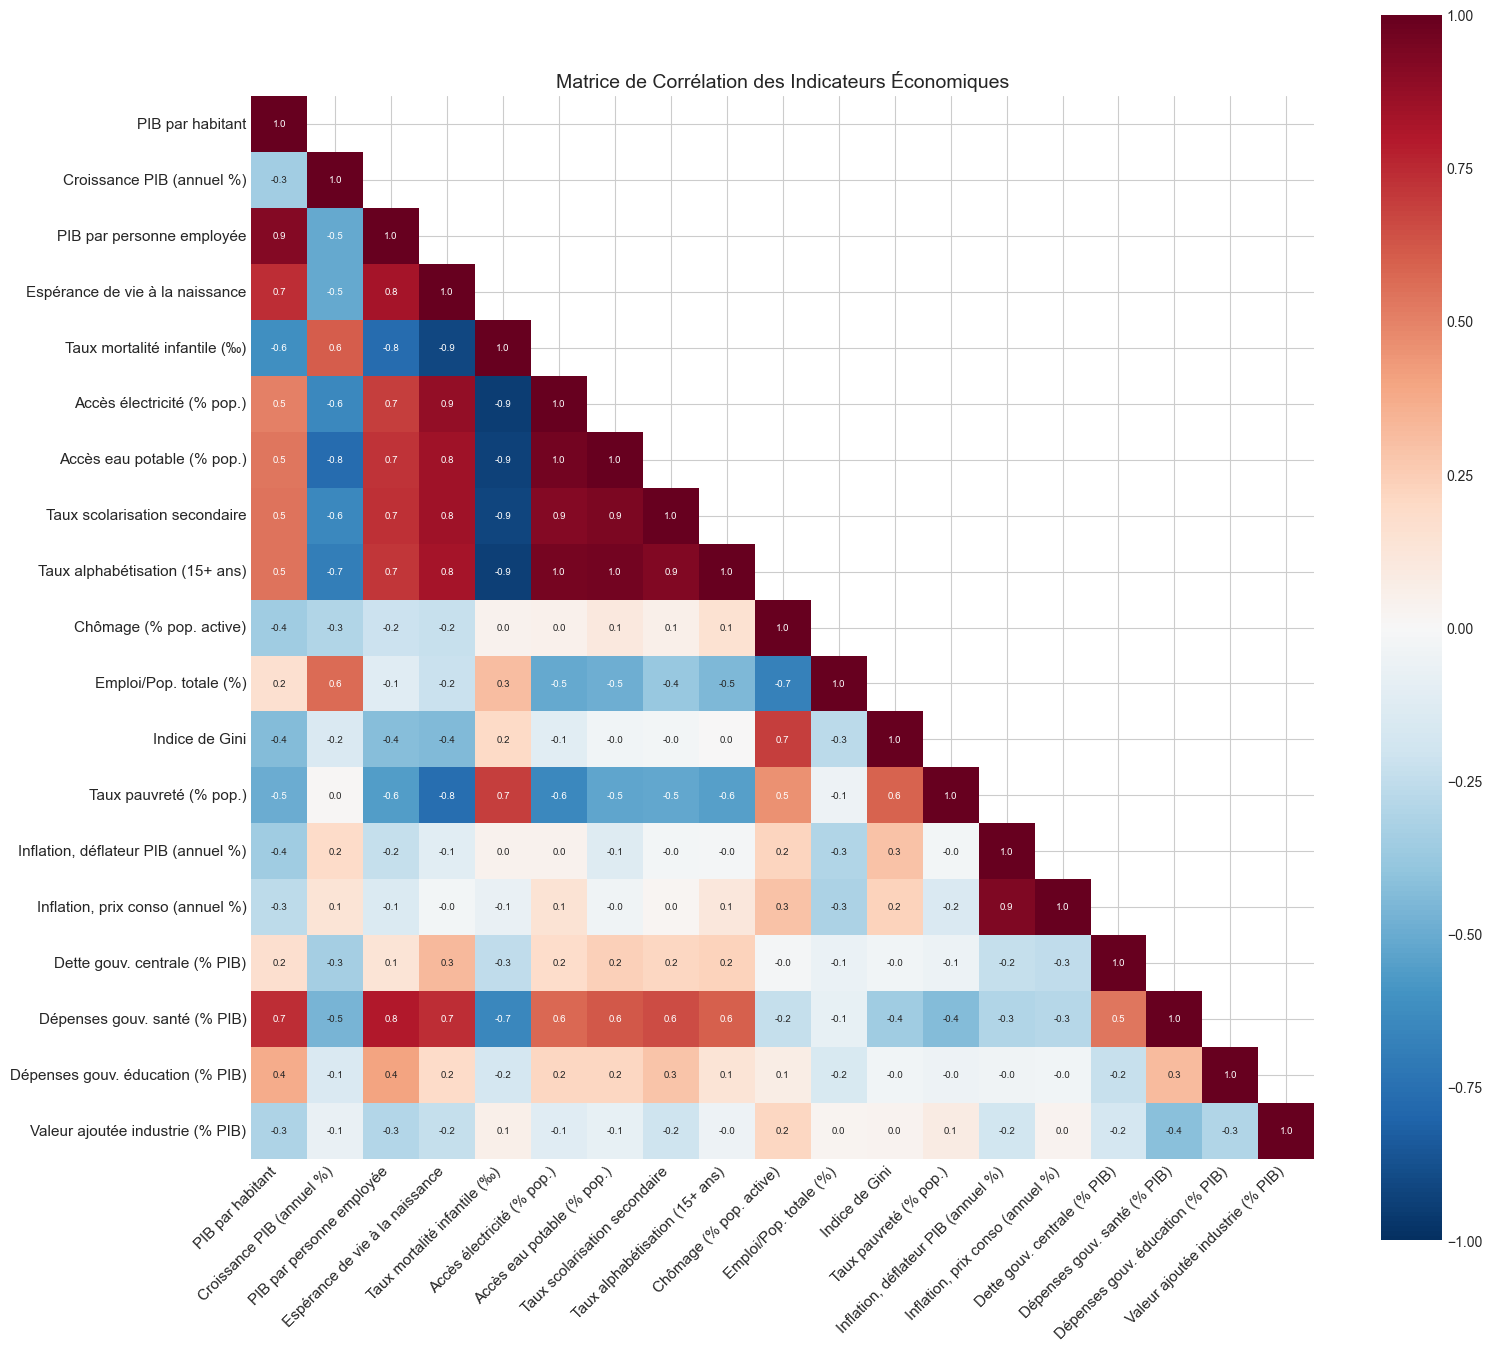

In [89]:
# Visualize correlation matrix as heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, mask=mask, square=True,
            annot_kws={'size': 7})
plt.title('Matrice de Corrélation des Indicateurs Économiques', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## Interprétation de la Matrice de Corrélation

Cette matrice de corrélation révèle les relations entre les différents indicateurs économiques. Les coefficients de corrélation varient de -1 à +1.

**Signification des couleurs :**
Les couleurs du graphique utilisent une échelle Rouge-Bleu inversée (RdBu_r) où le rouge indique des corrélations négatives, le blanc représente l'absence de corrélation (proche de 0), et le bleu indique des corrélations positives. Plus la couleur est intense, plus la relation entre les variables est forte.

**Bleu foncé (corrélation +0.7 à +1.0) :** Corrélation positive très forte. Quand une variable augmente, l'autre augmente également de manière très prévisible. Exemple : Si le PIB par habitant et l'accès à l'électricité ont une corrélation de +0.9, cela signifie que les pays avec un PIB élevé ont presque toujours un taux d'électrification élevé.


**Rouge clair (corrélation -0.3 à -0.7) :** Corrélation négative modérée. Quand une variable augmente, l'autre tend à diminuer. Exemple : Une corrélation de -0.6 entre le taux de chômage et la croissance économique montre une relation inverse modérée.



---
# PHASE 2: CHOIX DES DIMENSIONS (VALEURS PROPRES)

**Questions à répondre:**
- Calculer les valeurs propres (λ)
- Calculer le % de variance expliquée par chaque composante
- Déterminer le nombre d'axes à retenir (scree plot, seuil cumulatif)

## 2.1 Calcul des Valeurs Propres (Eigenvalues)

In [90]:
# Fit PCA with all components
pca = PCA()
pca.fit(Y_df)

# Get eigenvalues (variance explained by each component)
eigenvalues = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)

# Create eigenvalues table
eigenvalue_table = pd.DataFrame({
    'Composante': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Valeur Propre (λ)': eigenvalues,
    '% Variance': variance_ratio * 100,
    '% Cumulé': cumulative_variance * 100
})

print("="*60)
print("VALEURS PROPRES ET VARIANCE EXPLIQUÉE")
print("="*60)
print(eigenvalue_table.round(3).to_string(index=False))

VALEURS PROPRES ET VARIANCE EXPLIQUÉE
Composante  Valeur Propre (λ)  % Variance  % Cumulé
       PC1              9.003      44.890    44.890
       PC2              3.585      17.874    62.764
       PC3              2.193      10.935    73.699
       PC4              1.571       7.834    81.533
       PC5              1.272       6.344    87.877
       PC6              0.672       3.352    91.229
       PC7              0.537       2.678    93.907
       PC8              0.441       2.200    96.107
       PC9              0.343       1.712    97.819
      PC10              0.160       0.798    98.617
      PC11              0.115       0.576    99.193
      PC12              0.058       0.289    99.481
      PC13              0.036       0.180    99.661
      PC14              0.032       0.158    99.820
      PC15              0.027       0.135    99.955
      PC16              0.007       0.034    99.989
      PC17              0.002       0.008    99.997
      PC18              0.

## Ajustement de l'ACP et Calcul des Valeurs Propres
Cette étape ajuste l'Analyse en Composantes Principales sur toutes les variables et calcule les valeurs propres (eigenvalues) pour déterminer combien de composantes principales conserver.

**Ce que nous calculons :**
Les valeurs propres (λ) représentent la variance capturée par chaque composante, le pourcentage de variance expliquée par chaque composante, et la variance cumulée qui indique combien d'information est conservée avec les N premières composantes.

**Critères de sélection :**
Critère de Kaiser : conserver les composantes avec λ > 1
Critère de variance cumulée : conserver suffisamment de composantes pour expliquer 70-90% de la variance totale

## 2.2 Scree Plot (Éboulis des Valeurs Propres)

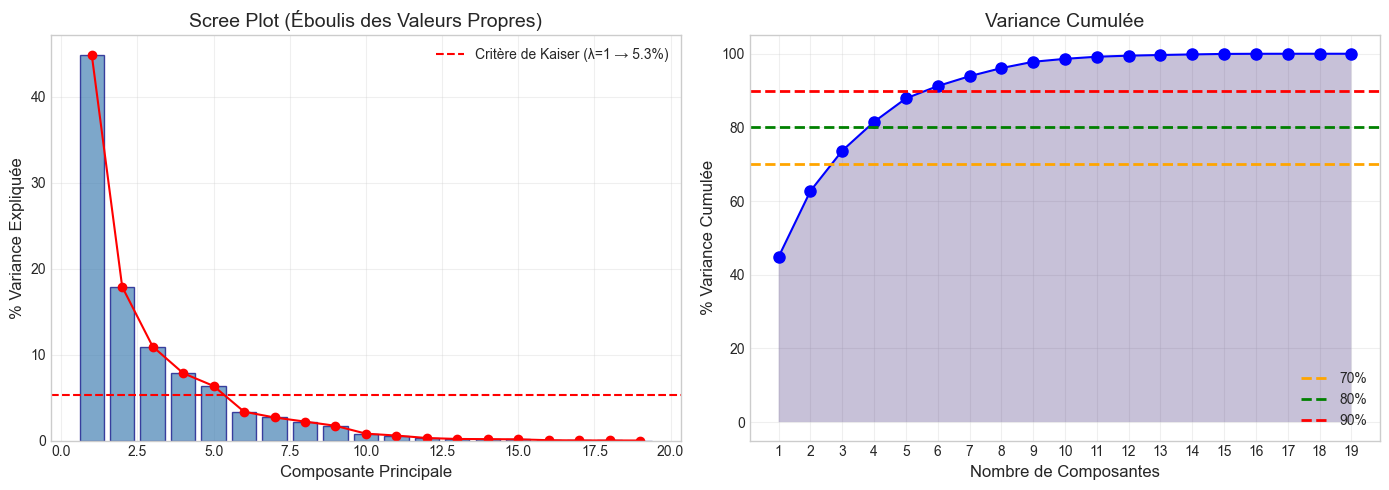

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Scree plot (individual variance)
ax1 = axes[0]
components = range(1, len(eigenvalues) + 1)
ax1.bar(components, variance_ratio * 100, alpha=0.7, color='steelblue', edgecolor='navy')
ax1.plot(components, variance_ratio * 100, 'ro-', markersize=6)
ax1.axhline(y=100/len(eigenvalues), color='red', linestyle='--',
            label=f'Critère de Kaiser (λ=1 → {100/len(eigenvalues):.1f}%)')
ax1.set_xlabel('Composante Principale', fontsize=12)
ax1.set_ylabel('% Variance Expliquée', fontsize=12)
ax1.set_title('Scree Plot (Éboulis des Valeurs Propres)', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative variance
ax2 = axes[1]
ax2.plot(components, cumulative_variance * 100, 'bo-', markersize=8)
ax2.axhline(y=70, color='orange', linestyle='--', linewidth=2, label='70%')
ax2.axhline(y=80, color='green', linestyle='--', linewidth=2, label='80%')
ax2.axhline(y=90, color='red', linestyle='--', linewidth=2, label='90%')
ax2.fill_between(components, cumulative_variance * 100, alpha=0.3)
ax2.set_xlabel('Nombre de Composantes', fontsize=12)
ax2.set_ylabel('% Variance Cumulée', fontsize=12)
ax2.set_title('Variance Cumulée', fontsize=14)
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(components) # Ensure integer ticks on x-axis

plt.tight_layout()
plt.show()

## 2.3 Choix du Nombre d'Axes à Retenir

In [92]:
# Criteria for selecting number of components
n_70 = np.argmax(cumulative_variance >= 0.70) + 1
n_80 = np.argmax(cumulative_variance >= 0.80) + 1
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_kaiser = np.sum(eigenvalues >= 1)  # Kaiser criterion: eigenvalue >= 1

print("="*60)
print("CHOIX DU NOMBRE D'AXES À RETENIR")
print("="*60)
print(f"\n📊 Critères de sélection:")
print(f"   • Critère de Kaiser (λ ≥ 1): {n_kaiser} composantes")
print(f"   • Seuil 70% variance: {n_70} composantes ({cumulative_variance[n_70-1]*100:.1f}%)")
print(f"   • Seuil 80% variance: {n_80} composantes ({cumulative_variance[n_80-1]*100:.1f}%)")
print(f"   • Seuil 90% variance: {n_90} composantes ({cumulative_variance[n_90-1]*100:.1f}%)")

# Decision
n_components = 3  # We'll use 3 for visualization
print(f"\n✅ DÉCISION: Retenir {n_components} axes pour l'analyse")
print(f"   Variance expliquée: {cumulative_variance[n_components-1]*100:.1f}%")
print(f"   Justification: Visualisation 3D et meilleure couverture de variance")

CHOIX DU NOMBRE D'AXES À RETENIR

📊 Critères de sélection:
   • Critère de Kaiser (λ ≥ 1): 5 composantes
   • Seuil 70% variance: 3 composantes (73.7%)
   • Seuil 80% variance: 4 composantes (81.5%)
   • Seuil 90% variance: 6 composantes (91.2%)

✅ DÉCISION: Retenir 3 axes pour l'analyse
   Variance expliquée: 73.7%
   Justification: Visualisation 3D et meilleure couverture de variance


In [93]:
# Fit PCA with selected components and transform data
pca_final = PCA(n_components=n_components)
F = pca_final.fit_transform(Y_df)  # Scores (coordinates of individuals)

# Create DataFrame for scores
F_df = pd.DataFrame(F, columns=[f'F{i+1}' for i in range(n_components)], index=Y_df.index)

print(f"✓ PCA appliquée avec {n_components} composantes")
print(f"   PC1 explique {pca_final.explained_variance_ratio_[0]*100:.1f}% de la variance")
print(f"   PC2 explique {pca_final.explained_variance_ratio_[1]*100:.1f}% de la variance")
print(f"   PC3 explique {pca_final.explained_variance_ratio_[2]*100:.1f}% de la variance")

✓ PCA appliquée avec 3 composantes
   PC1 explique 44.9% de la variance
   PC2 explique 17.9% de la variance
   PC3 explique 10.9% de la variance


---
# PHASE 3: ANALYSE DES VARIABLES (COLONNES)

**Questions à répondre:**
- Projections des variables sur les axes (Loadings)
- Cercle des corrélations
- Qualité de représentation (Cos²) des variables
- Contributions des variables aux axes
- Interprétation des axes

## 3.1 Loadings (Corrélations Variables-Composantes)

In [94]:
# Loadings = correlations between original variables and principal components
# For standardized data: loadings = eigenvectors * sqrt(eigenvalue)
loadings = pca_final.components_.T * np.sqrt(pca_final.explained_variance_)

loadings_df = pd.DataFrame(loadings,
                           columns=[f'PC{i+1}' for i in range(n_components)],
                           index=numeric_cols)

print("="*60)
print("LOADINGS (CORRÉLATIONS VARIABLES-COMPOSANTES)")
print("="*60)
print("\nCes valeurs représentent les coordonnées des variables")
print("dans le cercle des corrélations.\n")
print(loadings_df.round(3))

LOADINGS (CORRÉLATIONS VARIABLES-COMPOSANTES)

Ces valeurs représentent les coordonnées des variables
dans le cercle des corrélations.

                                       PC1    PC2    PC3
PIB par habitant                     0.766 -0.465 -0.000
Croissance PIB (annuel %)           -0.681 -0.377  0.499
PIB par personne employée            0.908 -0.243  0.036
Espérance de vie à la naissance      0.978 -0.119  0.156
Taux mortalité infantile (‰)        -0.976 -0.120 -0.110
Accès électricité (% pop.)           0.952  0.280  0.117
Accès eau potable (% pop.)           0.964  0.256 -0.113
Taux scolarisation secondaire        0.945  0.219 -0.003
Taux alphabétisation (15+ ans)       0.943  0.311 -0.002
Chômage (% pop. active)             -0.100  0.856 -0.334
Emploi/Pop. totale (%)              -0.335 -0.789  0.120
Indice de Gini                      -0.288  0.732 -0.310
Taux pauvreté (% pop.)              -0.669  0.282 -0.567
Inflation, déflateur PIB (annuel %) -0.166  0.596  0.724
Inflation

## 3.2 Cercle des Corrélations

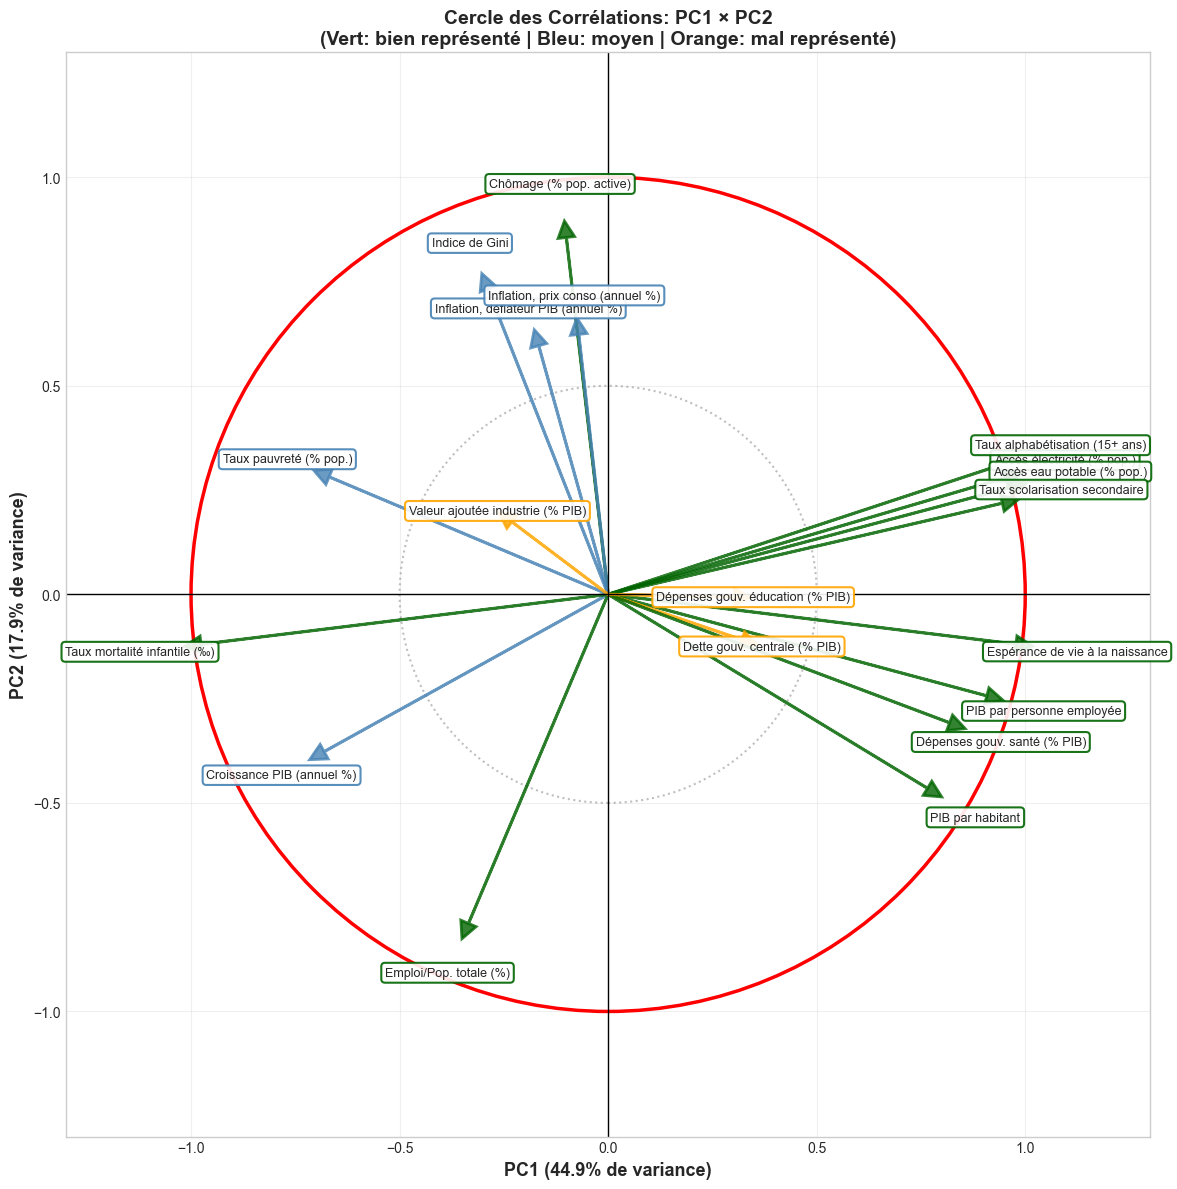


Plan PC1 × PC2



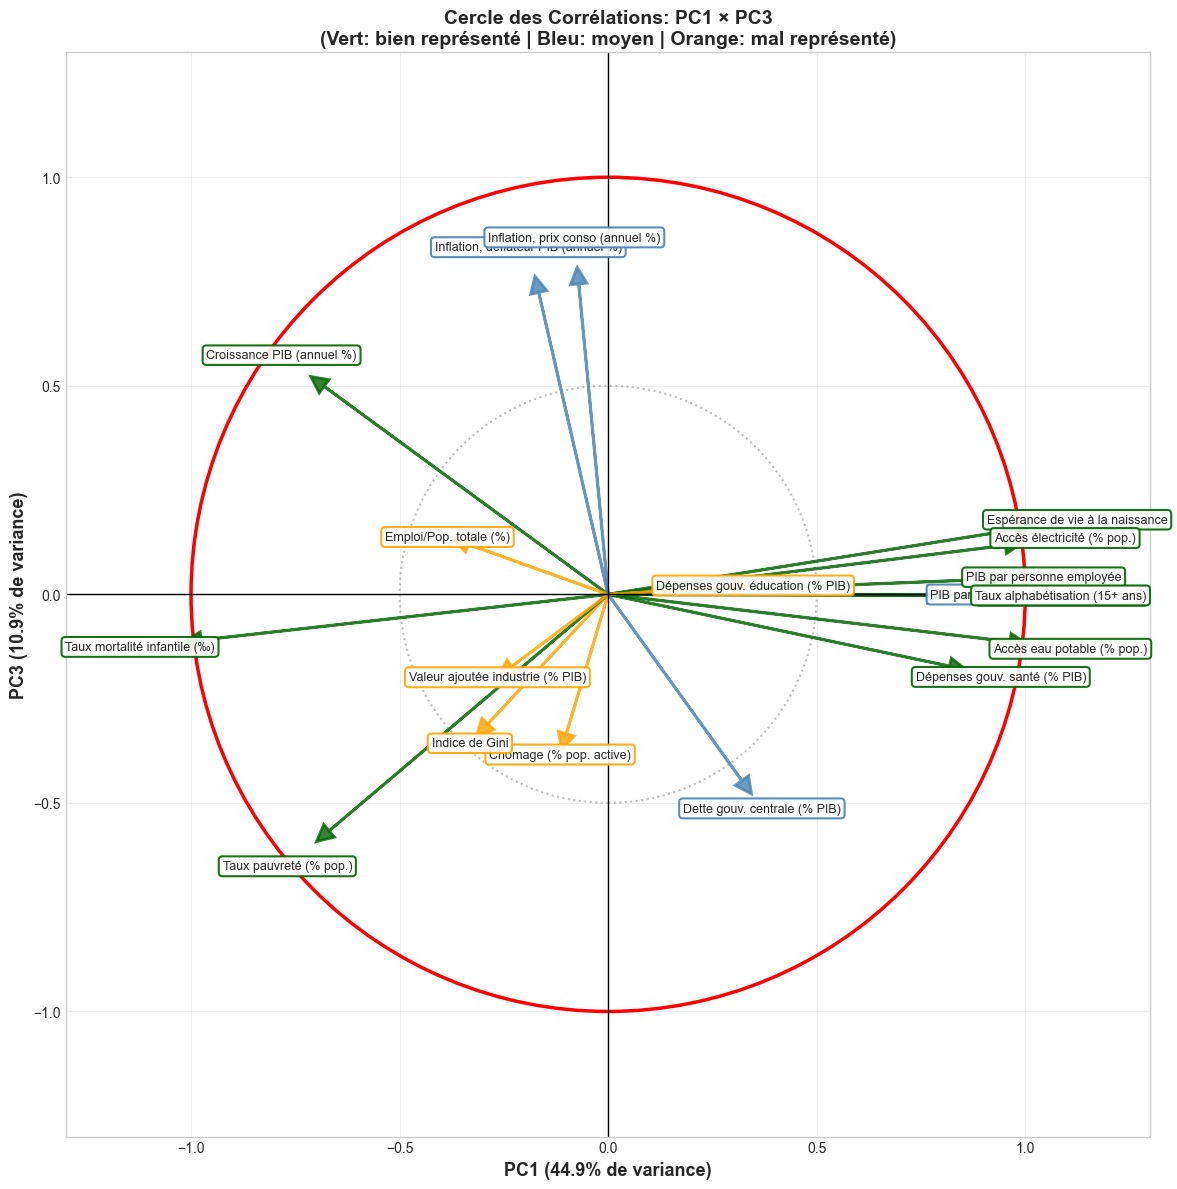


Plan PC1 × PC3



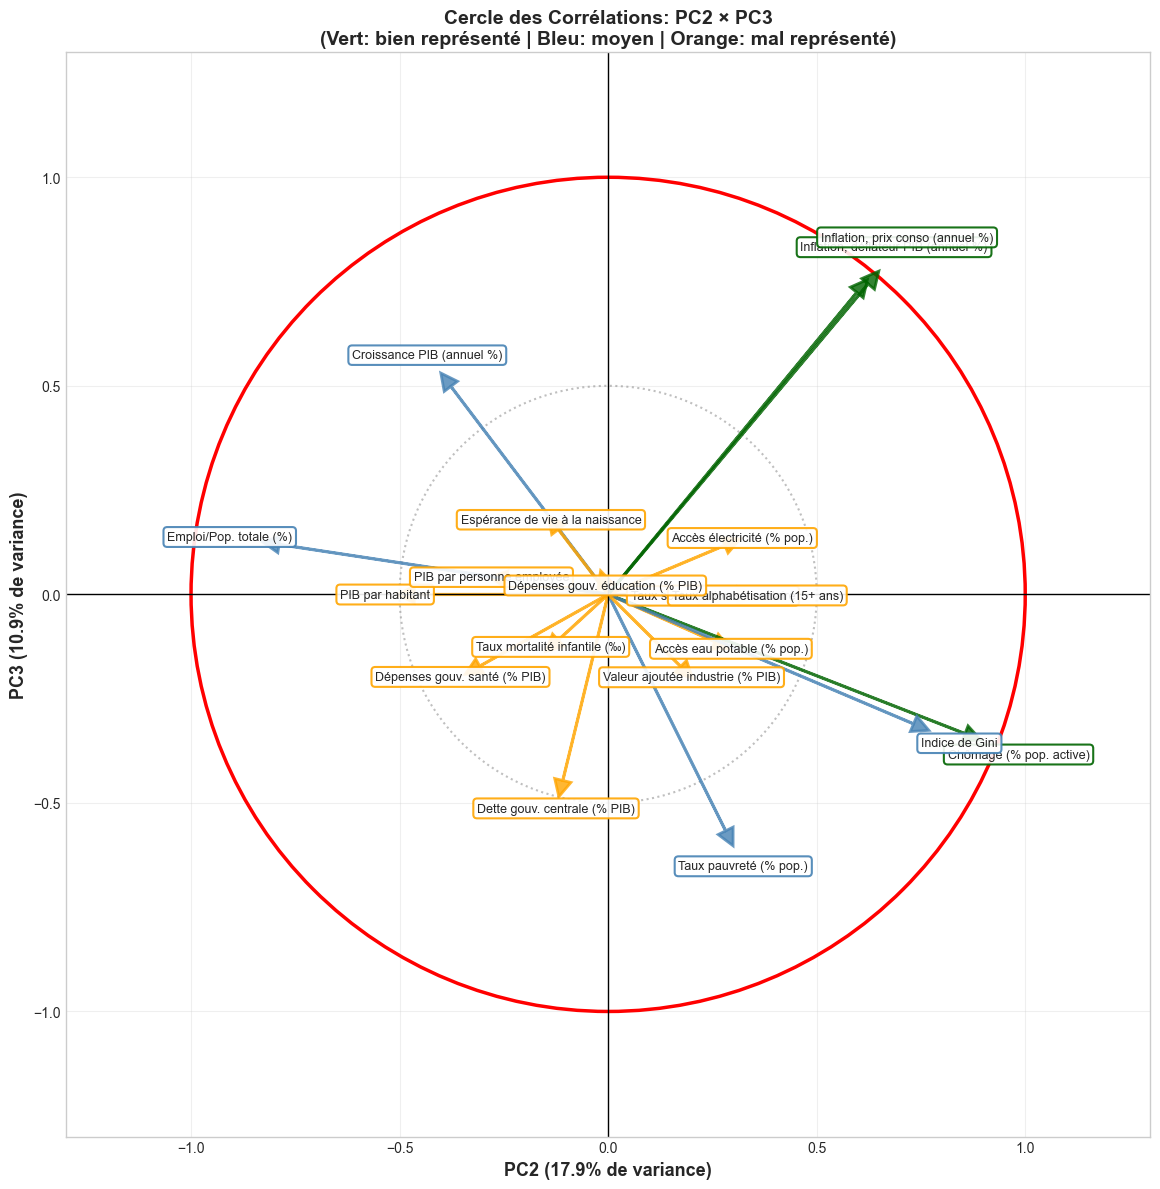


Plan PC2 × PC3



In [95]:
# ============================================================
# CERCLES DES CORRÉLATIONS - 3 figures séparées (version lisible)
# ============================================================

# Define the 3 PC pairs
pc_pairs = [(0, 1, 'PC1', 'PC2'), (0, 2, 'PC1', 'PC3'), (1, 2, 'PC2', 'PC3')]

for pc_x, pc_y, name_x, name_y in pc_pairs:
    
    # Create a new LARGE figure for each
    fig, ax = plt.subplots(figsize=(14, 12))
    
    # Draw circles
    circle_outer = plt.Circle((0, 0), 1, color='red', fill=False, linestyle='-', linewidth=2.5)
    ax.add_artist(circle_outer)
    circle_inner = plt.Circle((0, 0), 0.5, color='gray', fill=False, linestyle=':', linewidth=1.5, alpha=0.5)
    ax.add_artist(circle_inner)
    
    # Plot arrows for each variable
    for var in loadings_df.index:
        x = loadings_df.loc[var, name_x]
        y = loadings_df.loc[var, name_y]
        distance = np.sqrt(x**2 + y**2)
        
        # Color based on distance
        if distance > 0.8:
            color = 'darkgreen'
        elif distance > 0.5:
            color = 'steelblue'
        else:
            color = 'orange'
        
        # Draw arrow
        ax.arrow(0, 0, x, y, head_width=0.04, head_length=0.04, 
                 fc=color, ec=color, linewidth=2, alpha=0.8)
        
        # Add variable name with good visibility
        ax.text(x*1.15, y*1.15, var, fontsize=9, ha='center', va='center',
                bbox=dict(facecolor='white', edgecolor=color, alpha=0.9, 
                         boxstyle='round,pad=0.3', linewidth=1.5))
    
    # Set axis properties
    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-1.3, 1.3)
    ax.set_aspect('equal')
    ax.axhline(0, color='k', linewidth=1)
    ax.axvline(0, color='k', linewidth=1)
    ax.grid(True, alpha=0.3)
    
    # Labels
    ax.set_xlabel(f'{name_x} ({pca_final.explained_variance_ratio_[pc_x]*100:.1f}% de variance)', 
                 fontsize=13, fontweight='bold')
    ax.set_ylabel(f'{name_y} ({pca_final.explained_variance_ratio_[pc_y]*100:.1f}% de variance)', 
                 fontsize=13, fontweight='bold')
    ax.set_title(f'Cercle des Corrélations: {name_x} × {name_y}\n(Vert: bien représenté | Bleu: moyen | Orange: mal représenté)', 
                fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{'='*60}")
    print(f"Plan {name_x} × {name_y}")
    
    print(f"{'='*60}\n")
   


## Interprétation du Cercle des Corrélations

---

### 📊 Légende des Couleurs

| Couleur | Signification | Distance au centre |
|---------|---------------|-------------------|
| 🟢 **Vert foncé** | Variables **bien représentées** | > 0.8 |
| 🔵 **Bleu** | Variables **moyennement représentées** | 0.5 - 0.8 |
| 🟠 **Orange** | Variables **mal représentées** | < 0.5 |

---

### 📐 Interprétation des Angles

| Angle entre variables | Signification |
|----------------------|---------------|
| **≈ 0°** (→) | Corrélation **POSITIVE** forte |
| **≈ 90°** (⊥) | Variables **NON corrélées** |
| **≈ 180°** (←) | Corrélation **NÉGATIVE** forte |

---

### 🎯 Qualité de Représentation

- **Variables SUR le cercle** (r = 1) : Parfaitement représentées sur ce plan
- **Variables PROCHES du cercle** : Bien représentées, interprétation fiable
- **Variables PRÈS du centre** : Mal représentées, leur information est sur d'autres axes (PC3)

---


## 3.3 Qualité de Représentation des Variables (Cos²)

In [96]:
# Cos² for variables = squared loadings (proportion of variance represented)
cos2_var = loadings_df ** 2
cos2_var['Total'] = cos2_var.sum(axis=1)

print("="*60)
print("QUALITÉ DE REPRÉSENTATION DES VARIABLES (Cos²)")
print("="*60)
print("\nCos² proche de 1 = variable bien représentée sur le plan")
print("Cos² proche de 0 = variable mal représentée (info sur autres axes)\n")
print(cos2_var.round(3))

QUALITÉ DE REPRÉSENTATION DES VARIABLES (Cos²)

Cos² proche de 1 = variable bien représentée sur le plan
Cos² proche de 0 = variable mal représentée (info sur autres axes)

                                       PC1    PC2    PC3  Total
PIB par habitant                     0.586  0.216  0.000  0.802
Croissance PIB (annuel %)            0.463  0.142  0.249  0.854
PIB par personne employée            0.824  0.059  0.001  0.885
Espérance de vie à la naissance      0.956  0.014  0.024  0.994
Taux mortalité infantile (‰)         0.952  0.014  0.012  0.979
Accès électricité (% pop.)           0.907  0.078  0.014  0.999
Accès eau potable (% pop.)           0.929  0.065  0.013  1.007
Taux scolarisation secondaire        0.893  0.048  0.000  0.941
Taux alphabétisation (15+ ans)       0.890  0.097  0.000  0.986
Chômage (% pop. active)              0.010  0.732  0.111  0.854
Emploi/Pop. totale (%)               0.112  0.622  0.014  0.749
Indice de Gini                       0.083  0.536  0.096  0

In [97]:
# Identify well and poorly represented variables
threshold = 0.5

print(f"\n{'='*60}")
print(f"INTERPRÉTATION (seuil Cos² = {threshold})")
print(f"{'='*60}")

well_represented = cos2_var[cos2_var['Total'] >= threshold].index.tolist()
poorly_represented = cos2_var[cos2_var['Total'] < threshold].index.tolist()

print(f"\n✅ Variables BIEN représentées (Cos² ≥ {threshold}):")
for var in well_represented:
    print(f"   • {var}: {cos2_var.loc[var, 'Total']:.3f}")

print(f"\n⚠️ Variables MAL représentées (Cos² < {threshold}):")
for var in poorly_represented:
    print(f"   • {var}: {cos2_var.loc[var, 'Total']:.3f}")


INTERPRÉTATION (seuil Cos² = 0.5)

✅ Variables BIEN représentées (Cos² ≥ 0.5):
   • PIB par habitant: 0.802
   • Croissance PIB (annuel %): 0.854
   • PIB par personne employée: 0.885
   • Espérance de vie à la naissance: 0.994
   • Taux mortalité infantile (‰): 0.979
   • Accès électricité (% pop.): 0.999
   • Accès eau potable (% pop.): 1.007
   • Taux scolarisation secondaire: 0.941
   • Taux alphabétisation (15+ ans): 0.986
   • Chômage (% pop. active): 0.854
   • Emploi/Pop. totale (%): 0.749
   • Indice de Gini: 0.716
   • Taux pauvreté (% pop.): 0.848
   • Inflation, déflateur PIB (annuel %): 0.907
   • Inflation, prix conso (annuel %): 0.947
   • Dépenses gouv. santé (% PIB): 0.795

⚠️ Variables MAL représentées (Cos² < 0.5):
   • Dette gouv. centrale (% PIB): 0.314
   • Dépenses gouv. éducation (% PIB): 0.092
   • Valeur ajoutée industrie (% PIB): 0.113


## 3.4 Contributions des Variables aux Axes

In [98]:
n_comp = 3  # Force 3 axes
# Contribution of variables = (loading²) / eigenvalue * 100
eigenvectors = pca_final.components_.T
contrib_var = (eigenvectors ** 2) * 100
contrib_var_df = pd.DataFrame(contrib_var,
                              columns=[f'Contrib PC{i+1} (%)' for i in range(n_comp)],
                              index=numeric_cols)
print("="*70)
print("CONTRIBUTIONS DES VARIABLES AUX AXES (%)")
print("="*70)
print("\nLa somme des contributions = 100% pour chaque axe")
print(f"Contribution moyenne attendue = {100/len(numeric_cols):.1f}%\n")
# Display the table with all 3 PCs
display(contrib_var_df.round(2))


CONTRIBUTIONS DES VARIABLES AUX AXES (%)

La somme des contributions = 100% pour chaque axe
Contribution moyenne attendue = 5.3%



,Contrib PC1 (%),Contrib PC2 (%),Contrib PC3 (%)
PIB par habitant,6.51,6.03,0.00
Croissance PIB (annuel %),5.15,3.97,11.34
PIB par personne employée,9.15,1.65,0.06
Espérance de vie à la naissance,10.62,0.40,1.10
Taux mortalité infantile (‰),10.58,0.40,0.55
Accès électricité (% pop.),10.08,2.18,0.63
Accès eau potable (% pop.),10.31,1.83,0.59
Taux scolarisation secondaire,9.92,1.33,0.00
Taux alphabétisation (15+ ans),9.88,2.70,0.00
Chômage (% pop. active),0.11,20.42,5.08


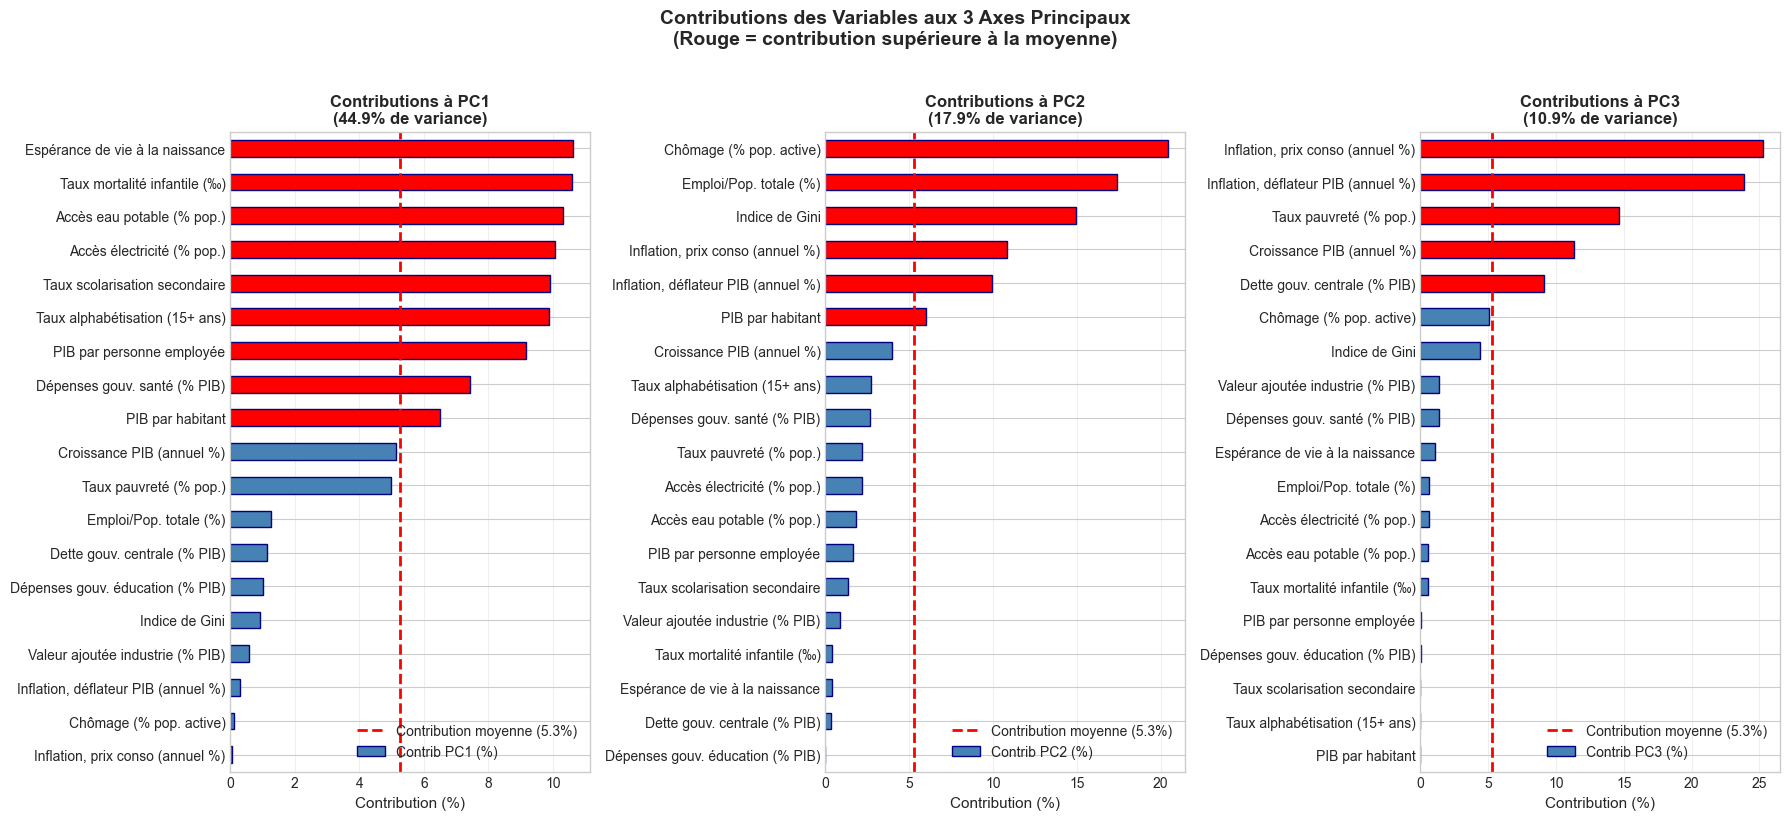

In [99]:

# ============================================================
# VISUALISATION DES CONTRIBUTIONS - 3 AXES
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

for idx, ax in enumerate(axes):
    pc_name = f'Contrib PC{idx+1} (%)'
    sorted_contrib = contrib_var_df[pc_name].sort_values(ascending=True)
    
    # Color based on contribution (above or below average)
    avg_contrib = 100 / len(numeric_cols)
    colors = ['red' if v > avg_contrib else 'steelblue' for v in sorted_contrib]
    
    sorted_contrib.plot(kind='barh', ax=ax, color=colors, edgecolor='navy')
    ax.axvline(x=avg_contrib, color='red', linestyle='--', linewidth=2,
               label=f'Contribution moyenne ({avg_contrib:.1f}%)')
    ax.set_xlabel('Contribution (%)', fontsize=11)
    ax.set_title(f'Contributions à PC{idx+1}\n({pca_final.explained_variance_ratio_[idx]*100:.1f}% de variance)', 
                fontsize=12, fontweight='bold')
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3, axis='x')

plt.suptitle('Contributions des Variables aux 3 Axes Principaux\n(Rouge = contribution supérieure à la moyenne)', 
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 3.5 Interprétation des Axes



### 📊 Axe PC1 (44,9%) : Niveau de Développement
| Direction | Signification | Variables clés |
|-----------|---------------|----------------|
| **→ Droite (Positif)** | Pays riches, développés, bonne infrastructure | PIB/habitant, Espérance de vie, Accès électricité |
| **← Gauche (Négatif)** | Pays en développement, pauvreté marquée | Forte mortalité infantile |
### 📊 Axe PC2 (17,9%) : Tension Sociale & Marché du Travail
| Direction | Signification | Variables clés |
|-----------|---------------|----------------|
| **↑ Haut (Positif)** | Instabilité sociale | Chômage élevé, Inégalités/Gini |
| **↓ Bas (Négatif)** | Marché du travail dynamique | Taux d'emploi élevé |
### 📊 Axe PC3 (10,9%) : Situation Monétaire & Fiscale
| Direction | Signification | Variables clés |
|-----------|---------------|----------------|
| **↑ Haut (Positif)** | Surchauffe économique | Inflation élevée, hausse des prix |
| **↓ Bas (Négatif)** | Poids de la dette | Dette gouvernementale |
---

